<a href="https://colab.research.google.com/github/LeonSilva15/data-analysis/blob/main/Bikes_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bikes store

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Loading the data

In [3]:
!wget 'https://raw.githubusercontent.com/LeonSilva15/bikes-store-analysis/main/sales_data.csv'

--2023-08-30 17:46:08--  https://raw.githubusercontent.com/LeonSilva15/data-analysis/main/data/sales_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15127245 (14M) [text/plain]
Saving to: ‘sales_data.csv’

sales_data.csv      100%[===================>]  14.43M  --.-KB/s    in 0.1s    

2023-08-30 17:46:09 (115 MB/s) - ‘sales_data.csv’ saved [15127245/15127245]


In [11]:
!head sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

In [4]:
sales_df = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date']
)

# The data at glance

In [7]:
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [13]:
sales_df.shape

(113036, 18)

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [15]:
sales_df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# Numerical analysis and visualization



In [16]:
sales_df[ 'Unit_Cost' ].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [17]:
sales_df[ 'Unit_Cost' ].mean()

267.296365759581

In [20]:
sales_df.Unit_Cost.median()

9.0

<Axes: >

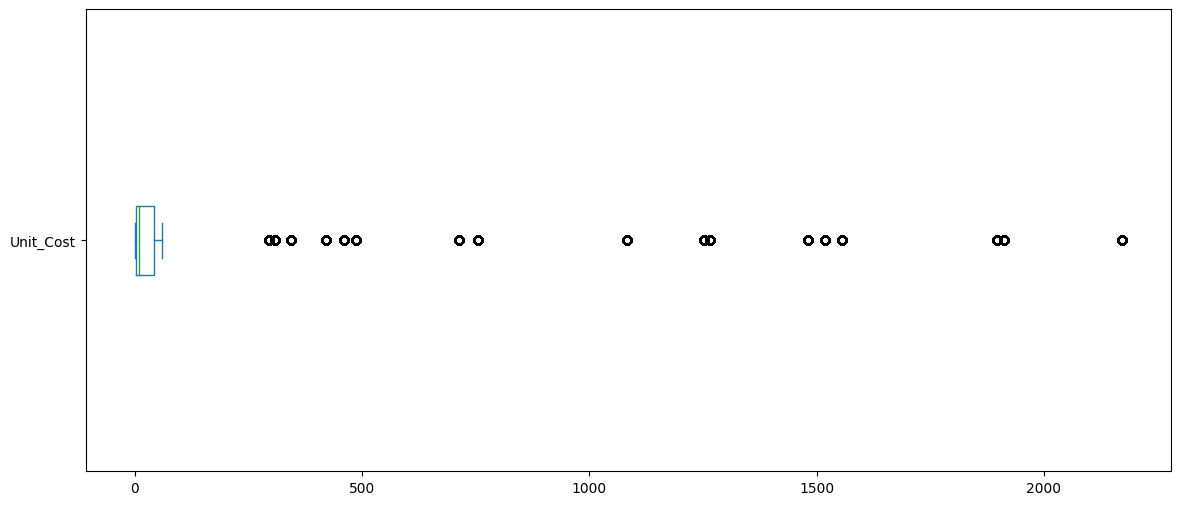

In [27]:
sales_df[ 'Unit_Cost' ].plot( kind='box', vert=False, figsize=(14, 6) )

<Axes: ylabel='Density'>

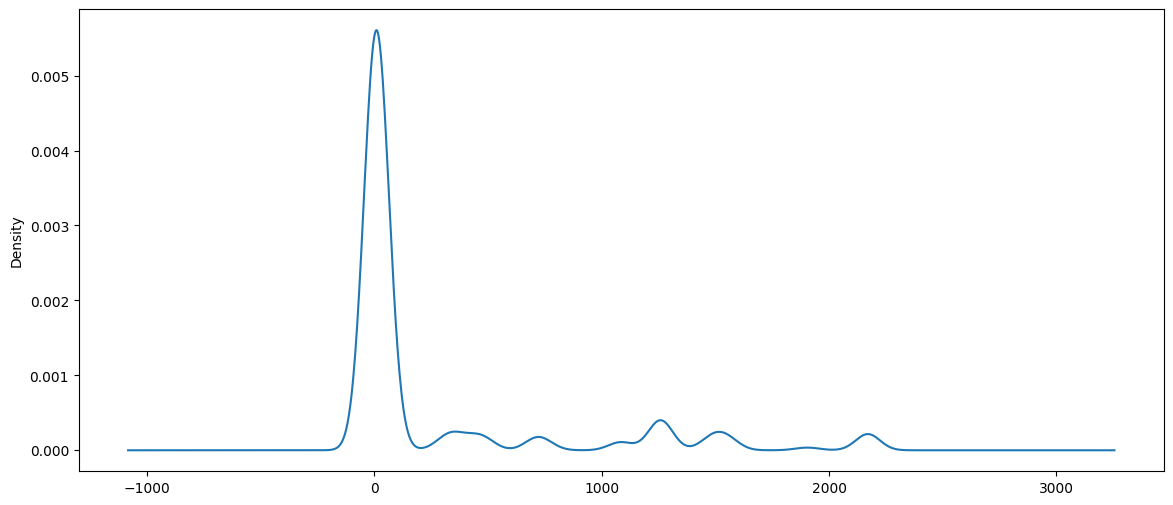

In [29]:
sales_df[ 'Unit_Cost' ].plot( kind='density', figsize=( 14, 6 ) )

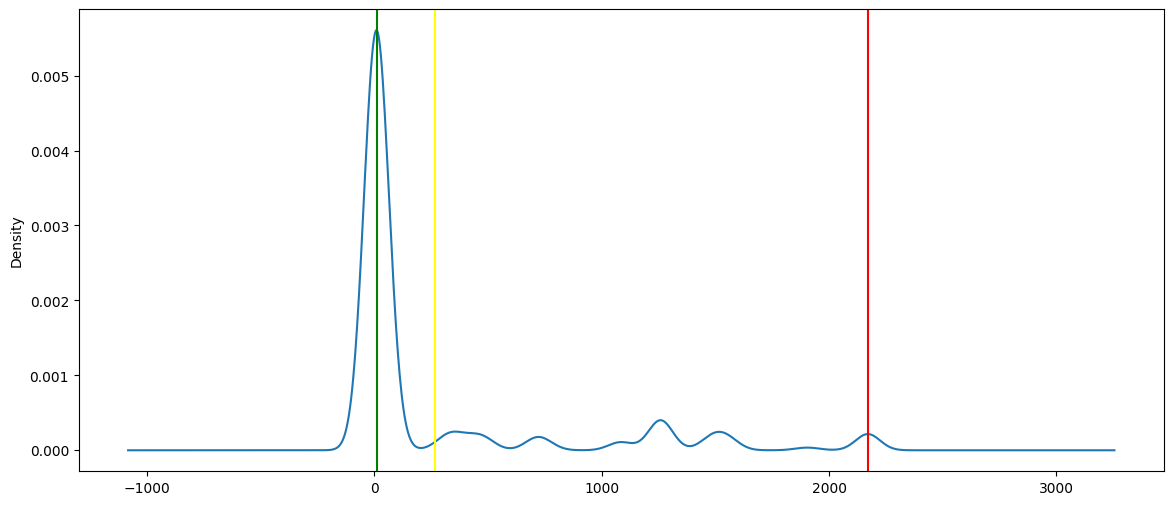

In [39]:
ax = sales_df[ 'Unit_Cost' ].plot( kind='density', figsize=( 14, 6 ) )
ax.axvline( sales_df[ 'Unit_Cost' ].median(), color='green' )
ax.axvline( sales_df[ 'Unit_Cost' ].mean(), color='yellow' )
ax.axvline( sales_df[ 'Unit_Cost' ].max() , color='red' )

Text(0.5, 0, 'Dollars')

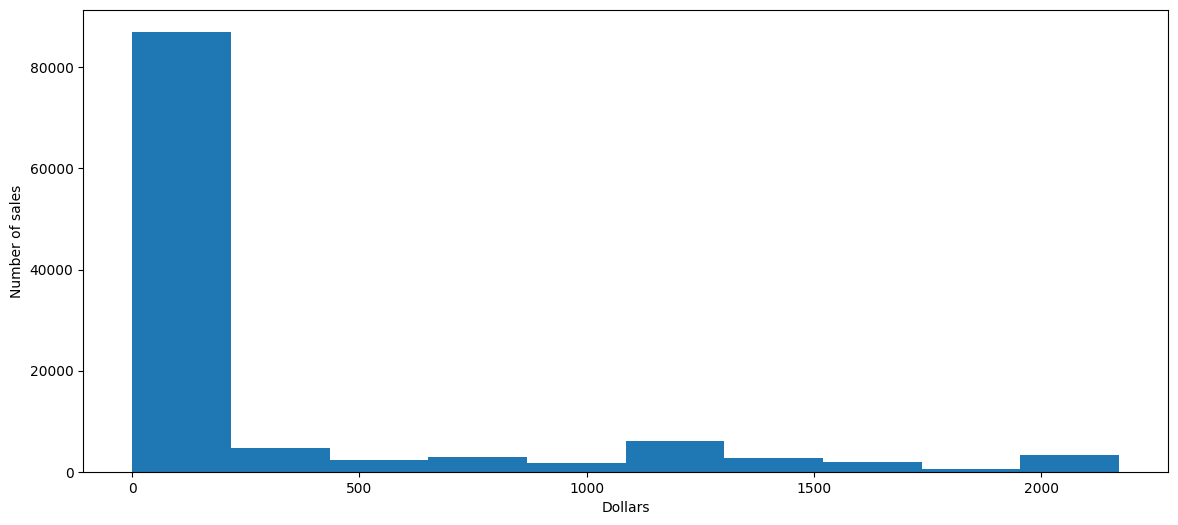

In [41]:
ax = sales_df[ 'Unit_Cost' ].plot( kind='hist', figsize=( 14, 6 ) )
ax.set_ylabel( 'Number of sales' )
ax.set_xlabel( 'Dollars' )

# Categorical analysis and visualization

In [43]:
sales_df[ 'Age_Group' ].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<Axes: ylabel='Age_Group'>

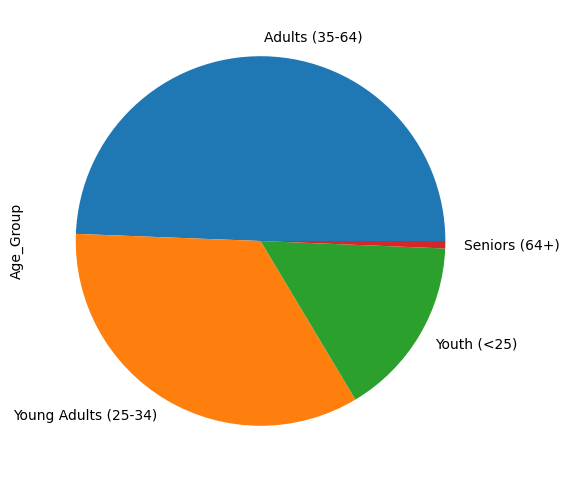

In [44]:
sales_df[ 'Age_Group' ].value_counts().plot( kind='pie', figsize=( 6, 6 ) )

Text(0, 0.5, 'Number of Sales')

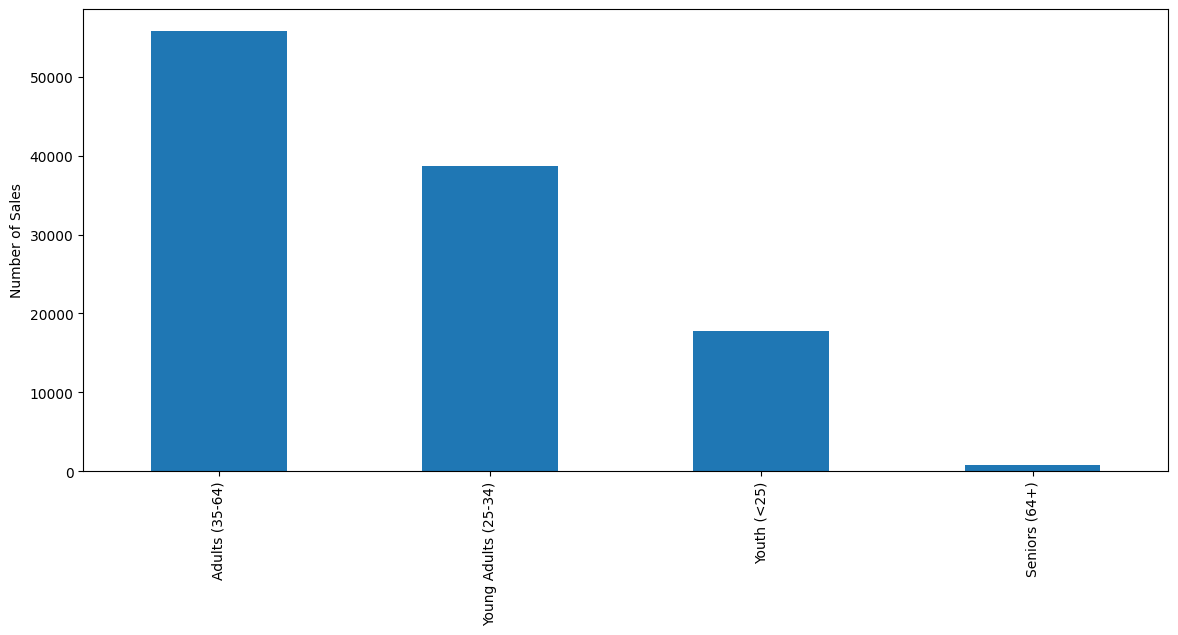

In [54]:
ax = sales_df[ 'Age_Group' ].value_counts().plot( kind='bar', figsize=( 14, 6 ) )
ax.set_ylabel( 'Number of Sales' )

# Relationship between the columns

In [59]:
corr = sales_df.corr()
corr

<ipython-input-59-797d8700a1b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales_df.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x7ff27c2d2080>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

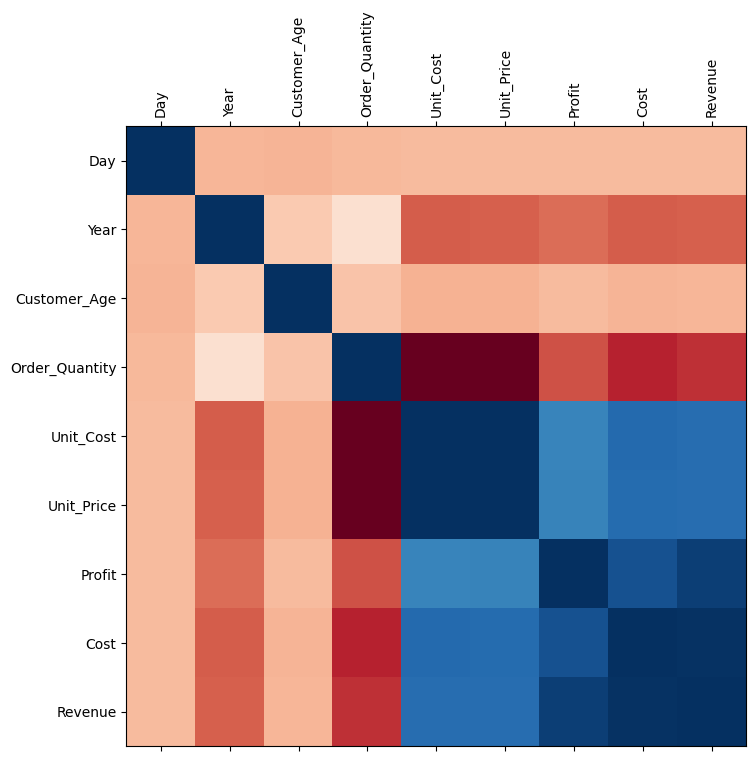

In [69]:
fig = plt.figure( figsize=( 8, 8 ) )
plt.matshow( corr, cmap='RdBu', fignum=fig.number )
plt.xticks( range( len( corr.columns ) ), corr.columns, rotation='vertical' )
plt.yticks( range( len( corr.columns ) ), corr.columns )

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

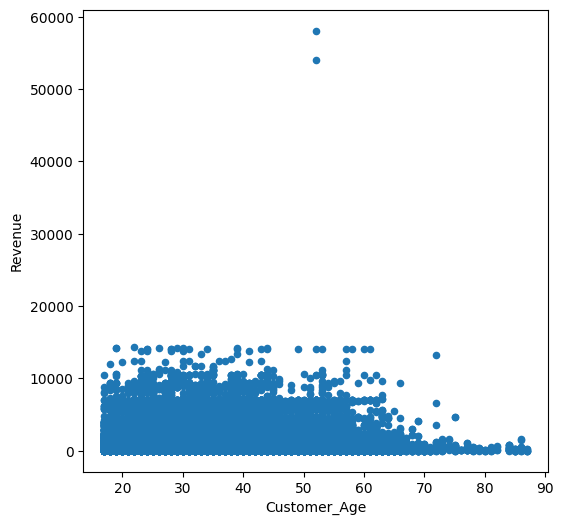

In [71]:
sales_df.plot( kind='scatter', x='Customer_Age', y='Revenue', figsize=( 6, 6 ) )

<Axes: xlabel='Revenue', ylabel='Profit'>

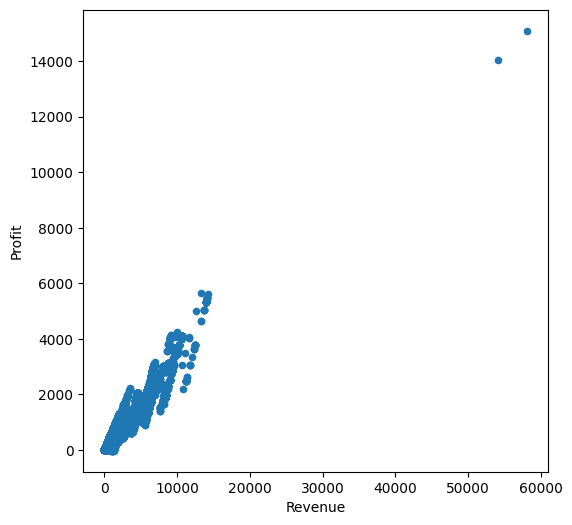

In [73]:
sales_df.plot( kind='scatter', x='Revenue', y='Profit', figsize=( 6, 6 ) )

Text(0, 0.5, 'Profit')

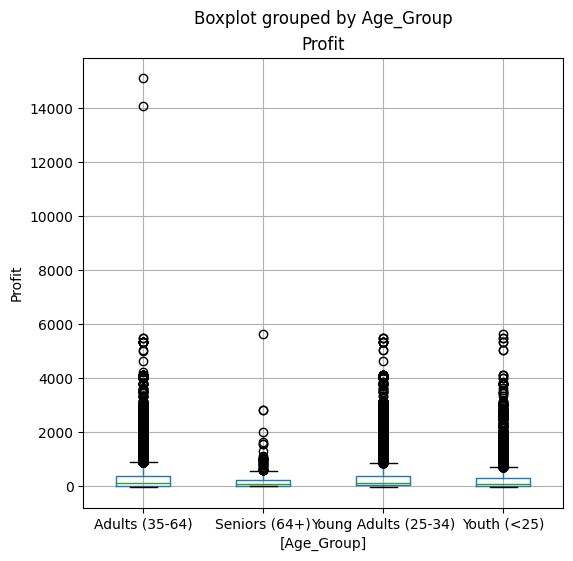

In [79]:
ax = sales_df[[ 'Profit', 'Age_Group' ]].boxplot( by='Age_Group', figsize=( 6, 6 ) )
ax.set_ylabel( 'Profit' )

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

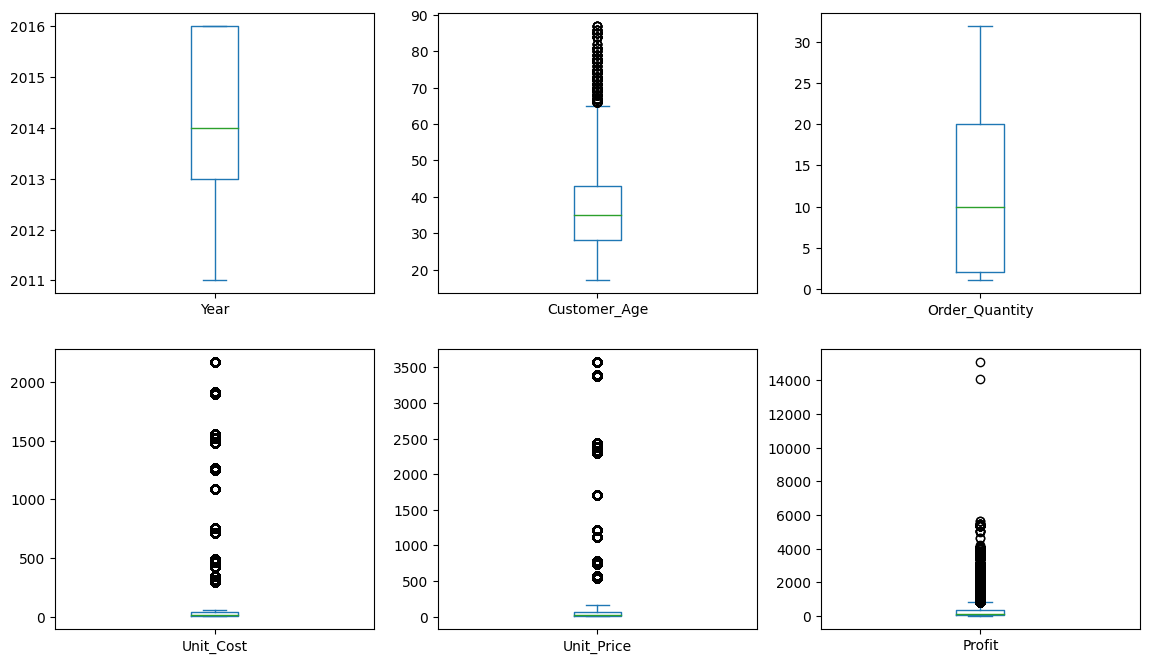

In [86]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales_df[ boxplot_cols ].plot( kind='box', subplots=True, layout=( 2, 3 ), figsize=( 14, 8 ) )

# Column wrangling

### Add and calculate a new Revenue_per_Age column

In [87]:
sales_df[ 'Revenue_per_Age' ] = sales_df[ 'Revenue' ] / sales_df[ 'Customer_Age' ]
sales_df[ 'Revenue_per_Age' ].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

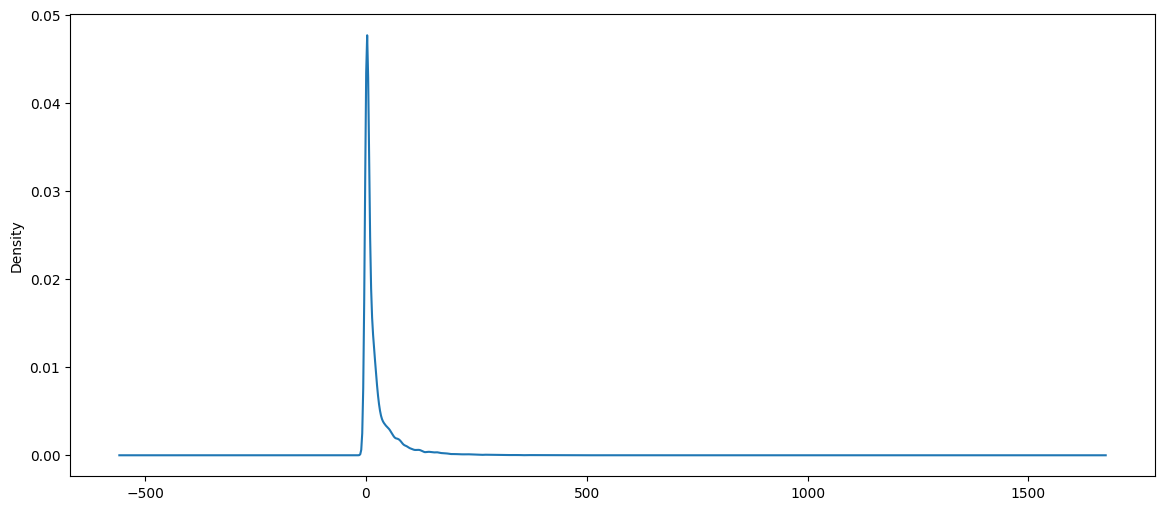

In [89]:
sales_df[ 'Revenue_per_Age' ].plot( kind='density', figsize=( 14, 6 ) )

<Axes: ylabel='Frequency'>

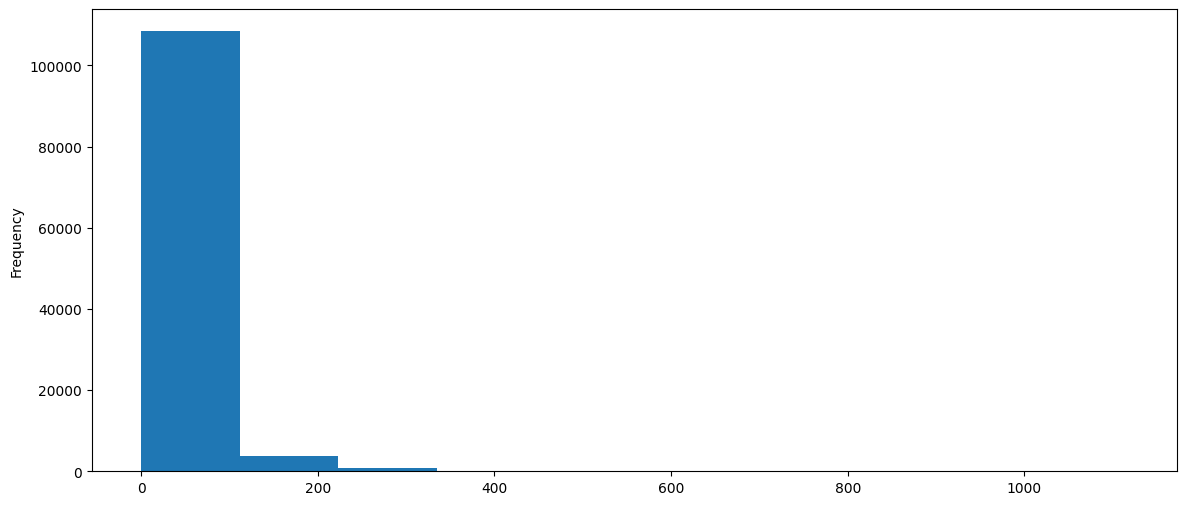

In [90]:
sales_df[ 'Revenue_per_Age' ].plot( kind='hist', figsize=( 14, 6 ) )

### Add and calculate a new Calculated_Cost column

In [6]:
sales_df['Calculated_Cost'] = sales_df['Order_Quantity'] * sales_df['Unit_Cost']
sales_df['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [7]:
( sales_df['Calculated_Cost'] != sales_df['Cost'] ).sum()

0

We can see the relationship between Cost and Profit using a scatter plot:

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

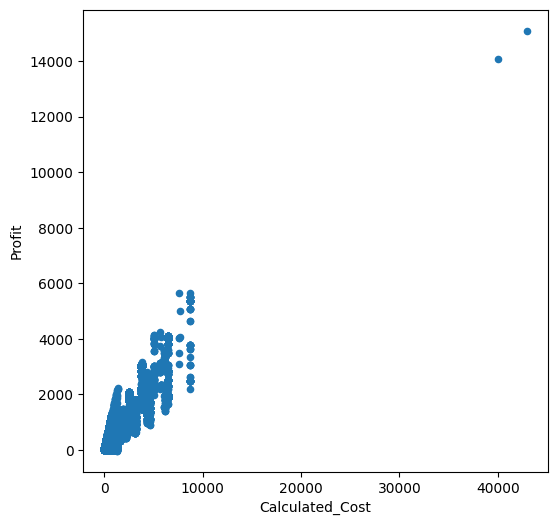

In [8]:
sales_df.plot( kind='scatter', x='Calculated_Cost', y='Profit', figsize=( 6, 6 ) )

### Add and calculate a new Calculated_Revenue column

In [9]:
sales_df[ 'Calculated_Revenue' ] = sales_df[ 'Cost' ] + sales_df[ 'Profit' ]
sales_df[ 'Calculated_Revenue' ].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [10]:
( sales_df[ 'Calculated_Revenue' ] != sales_df[ 'Revenue' ] ).sum()

0

In [11]:
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,180,418


<Axes: ylabel='Frequency'>

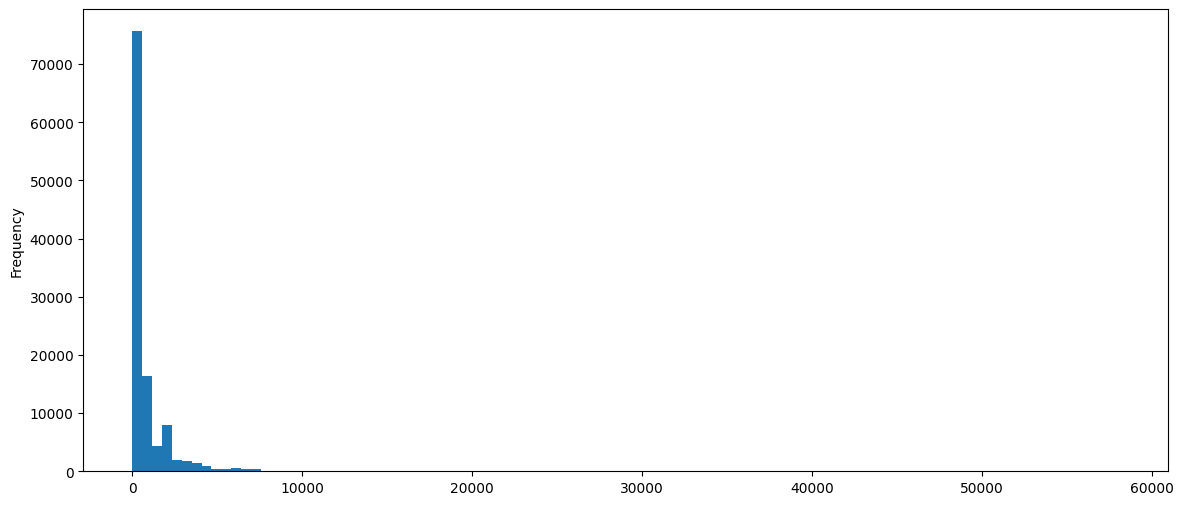

In [19]:
sales_df[ 'Revenue' ].plot( kind='hist', bins=100, figsize=( 14, 6 ) )

### Modify all Unit_Price values adding 3% tax to them

In [20]:
sales_df[ 'Unit_Price' ].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [21]:
sales_df[ 'Unit_Price' ] *= 1.03

In [22]:
sales_df[ 'Unit_Price' ].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

# Selection & Indexing

### Get all the sales made in the state of Kentucky

In [24]:
sales_df.loc[ sales_df[ 'State' ] == 'Kentucky' ]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30.90,32,22,54,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30.90,336,231,567,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30.90,16,11,27,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30.90,288,198,486,198,486


### Get the mean revenue of the Adults (35-64) sales group

In [32]:
sales_df.loc[ sales_df[ 'Age_Group' ] == 'Adults (35-64)', 'Revenue' ].mean()

762.8287654055604

### How many records belong to Age Group Youth (<25) or Adults (35-64)?

In [49]:
sales_df.loc[ ( sales_df['Age_Group'] == 'Youth (<25)' ) | ( sales_df['Age_Group'] == 'Adults (35-64)' )  ].shape[ 0 ]

73652

### Get the mean revenue of the sales group Adults (35-64) in United States

In [51]:
sales_df.loc[ ( sales_df[ 'Age_Group' ] == 'Adults (35-64)' ) & ( sales_df[ 'Country' ] == 'United States' ), 'Revenue' ].mean()

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [53]:
sales_df.loc[ ( sales_df[ 'Country' ] == 'France' ), 'Revenue' ].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [54]:
sales_df.loc[ sales_df[ 'Country' ] == 'France', 'Revenue' ] *= 1.1

In [55]:
sales_df.loc[ sales_df[ 'Country' ] == 'France', 'Revenue' ].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64